In [13]:
# hierachical clustering 장점
# 모델을 학습시킬 때 개수를 미리 정하지 않아도 됨 --> 클러스터 개수 설정 모호할 때 유리함
# 덴드로그램의 어떤 층에서 데이트를 구분하냐에 따라 조절함

# hierachical clustering 단점
# 모든데이터끼리의 거리를 반복해서 계산하기 때문에 많은 연산이 필요함 --> 대용량 데이터에 적용이 어려움



In [1]:
# 0.필요모듈 import
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# 1. 데이터셋 로드 (csv -> dataframe)
# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('DataSet/sales_data.csv', index_col=['customer_id'])
sales_df

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750
...,...,...
18144,30,90750
18168,243,1533530
18225,1,91430


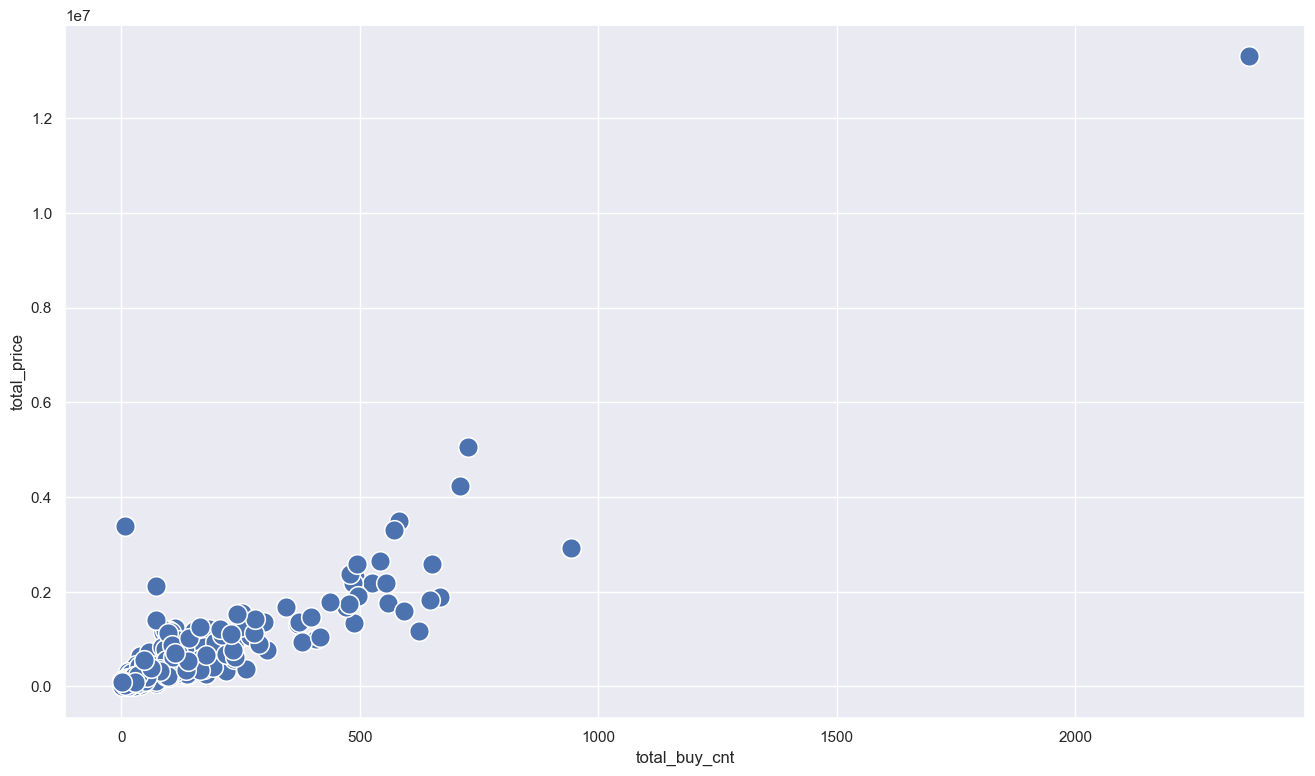

In [3]:
# 2. 데이터셋 시각화  (클러스터링 전)
sns.set(style='darkgrid',
        rc={'figure.figsize':(16, 9)})

# 데이터 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

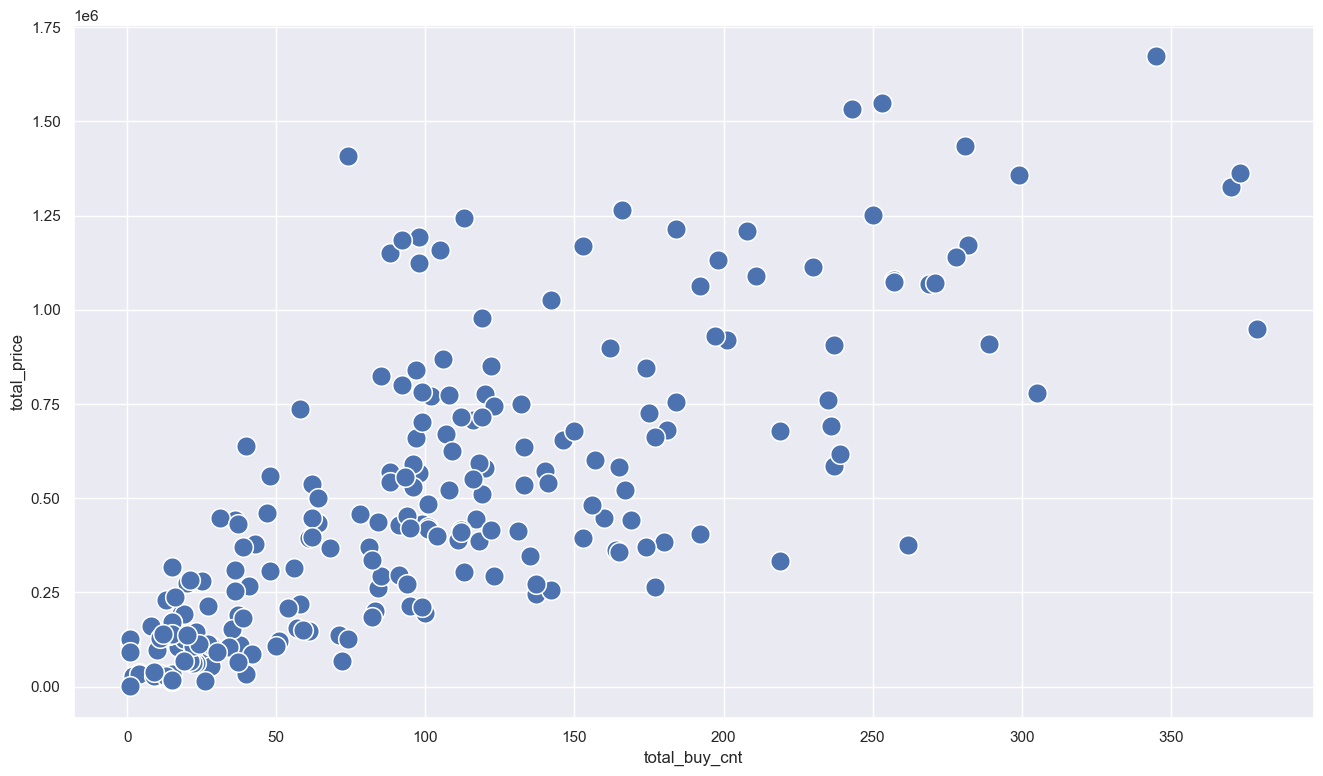

In [4]:
# 3. 제이터 이상치 제거 
# IQR 방법 사용
def get_outlier_mask(df, weight=1.5):   
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
    IQR_weight = IQR * weight

    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight

    outlier_per_column = (df < range_min) | (df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1)

    return is_outlier

outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)

# 아웃라이어 제거한 데이터 프레임만 추가
sales_df = sales_df[~outlier_idx_cust_df]

# 아웃라이어 제거한 데이터프레임 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.02
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.04
18168,1.69,2.74
18225,-1.24,-1.04


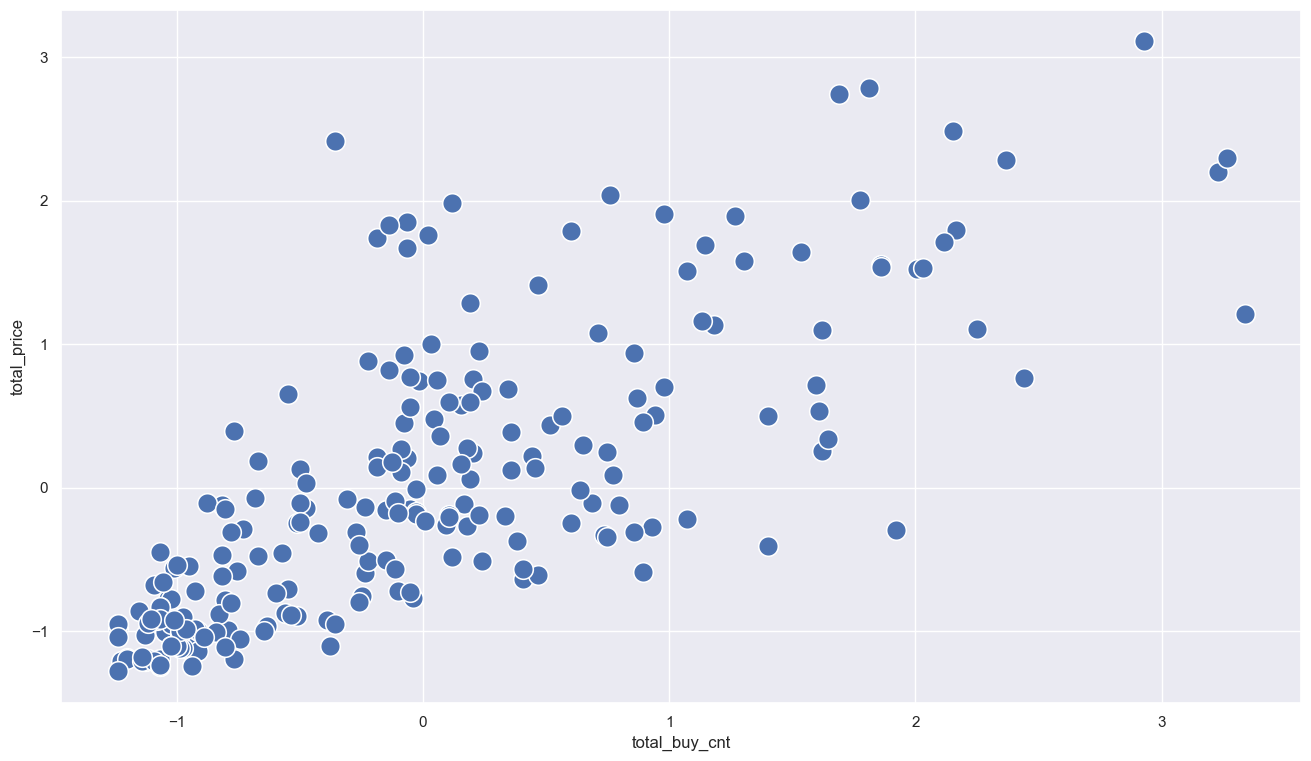

In [5]:
# 4. 데이터 표준화 (Stanardization)
df_mean = sales_df.mean()  # 각 컬럼의 평균값
df_std = sales_df.std()  # 각 컬럼의 표준편차

scaled_df = (sales_df - df_mean)/df_std  # 컬럼별 표준화 진행 

scaled_df.columns = ['total_buy_cnt', 'total_price']


# 인덱스 설정
scaled_df.index = sales_df.index 

# 아웃라이어 제거한 표준화 데이터프레임 시각화
sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], s=200)
scaled_df


In [9]:
# 6. 클러스터링 모델 선언 및 학습 (hierachical)
# 거리 : ward method
model = linkage(scaled_df, 'ward')
labelList = scaled_df.index 
labelList

Int64Index([12395, 12427, 12431, 12471, 12472, 12557, 12583, 12600, 12662,
            12682,
            ...
            17961, 17964, 18011, 18074, 18085, 18144, 18168, 18225, 18229,
            18239],
           dtype='int64', name='customer_id', length=225)

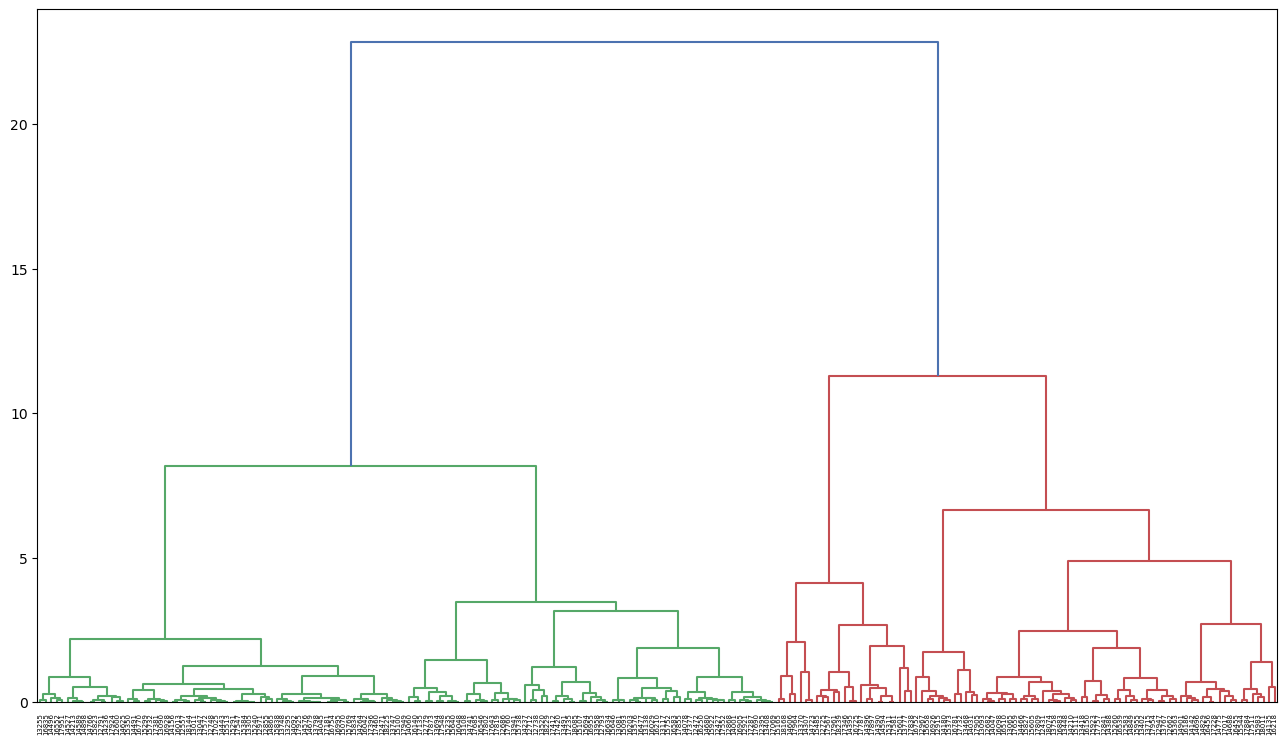

In [10]:
# 덴드로그램 사이즈와 스타일 조정
plt.figure(figsize=(16,9))
plt.style.use("default")

dendrogram(model, labels=labelList)
plt.show()

In [11]:
cluster_num = 5

# 고객별 클러스터 라벨 구하기
scaled_df['label'] = cut_tree(model, cluster_num)

pd.DataFrame(scaled_df['label'].value_counts())

,label
0,67
2,67
1,54
3,25
4,12


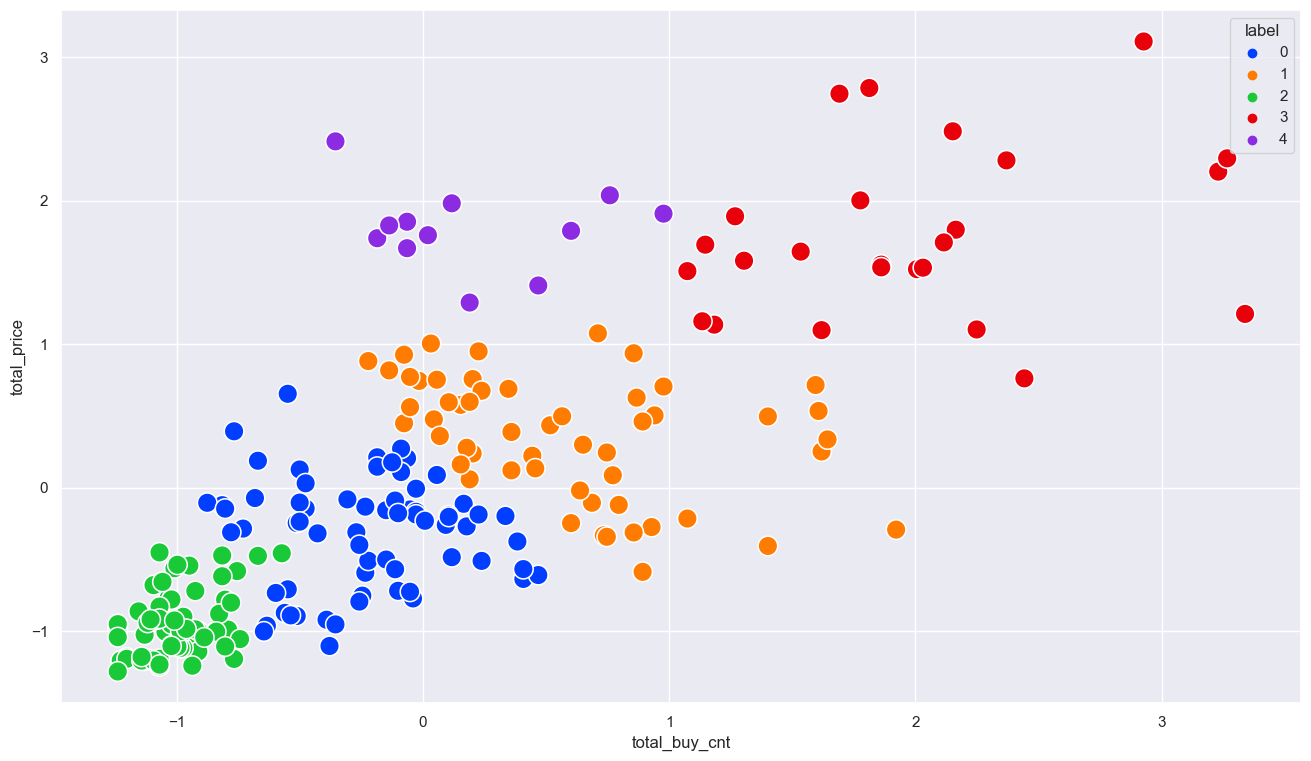

In [12]:
sns.set(style="darkgrid",
        rc = {'figure.figsize':(16,9)})

# 계층적 클러스터링
sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], hue=scaled_df['label'], s=200, palette='bright')